<a href="https://colab.research.google.com/github/Zaedul-Islam/Machine_Learning_Projects/blob/master/Car%20Acceptability%20Evaluation/Car%20Acceptability%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Acceptability Evaluation**

## **Importing the libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Seaborn is a python library for visualizing data. It is built on top of matplotlib and closely integrated with pandas data structure
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

# Compute classification accuracy for the provided model
from sklearn import metrics

# Some setting for this notebook to actually show the graphs inline
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # Suppress scientific float notation

## **Reading 'cereal' dataset**

In [0]:
filepath = '/content/drive/My Drive/Colab Notebooks/Machine Learning Projects/Car Acceptability Evaluation/Dataset/car.csv'
dataset = pd.read_csv(filepath)

## **Exploratory Data Analysis**

In [50]:
dataset.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


**Findings**:
1. No missing values in the dataset and all columns are ***Categorical***.

In [52]:
# Check for unique values and their count in each column
for column in dataset.columns:
    print(dataset[column].unique(), '\t', dataset[column].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [53]:
# Check how these unique attributes are distributed among the corresponding columns
for column in dataset.columns:
    print(dataset[column].value_counts())
    print()

low      432
vhigh    432
med      432
high     432
Name: buying, dtype: int64

low      432
vhigh    432
med      432
high     432
Name: maint, dtype: int64

4        432
3        432
2        432
5more    432
Name: doors, dtype: int64

4       576
more    576
2       576
Name: persons, dtype: int64

big      576
small    576
med      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



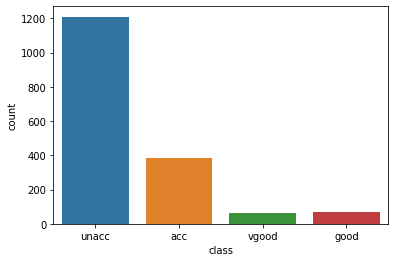

In [54]:
sns.countplot(dataset['class'])

**Findings**:
1. It can be seen that all the columns except 'class' are distributed equally among the dataset. This result 'class' is unbalanced with larger values of 'unacc' value. Therefore, this machine learning problem falls into the unbalanced multiclass classification.

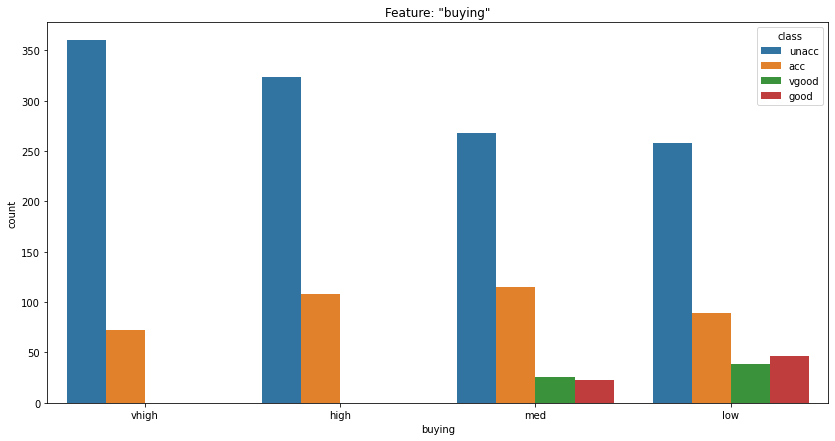

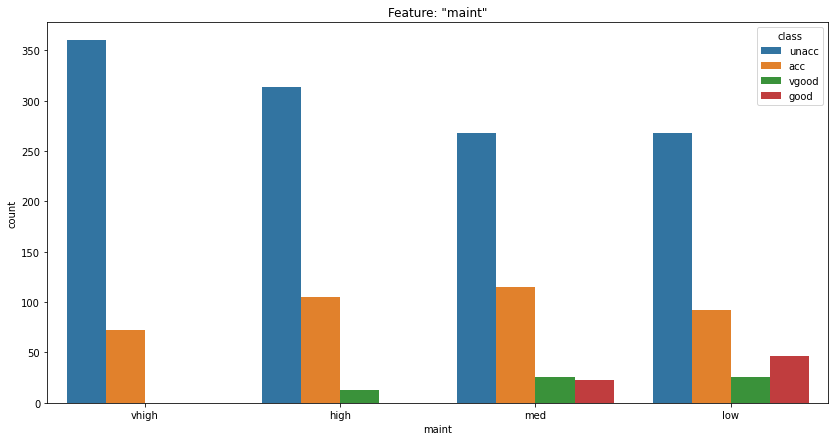

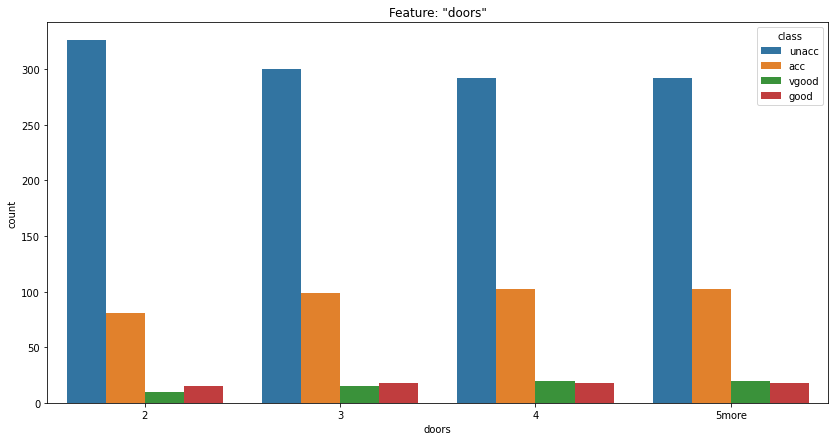

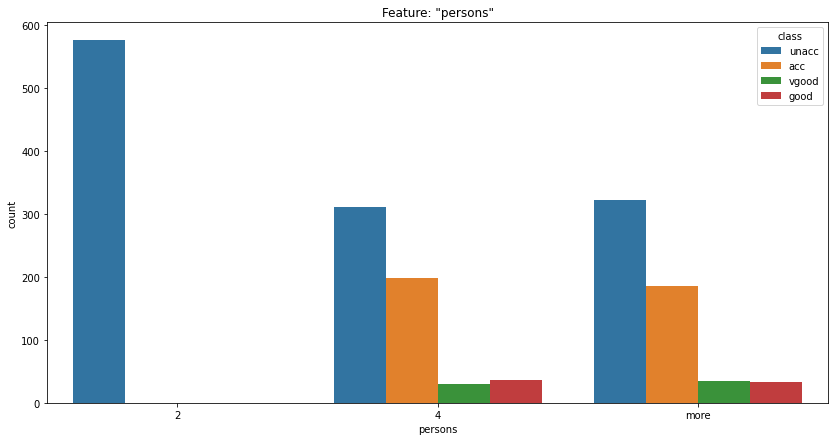

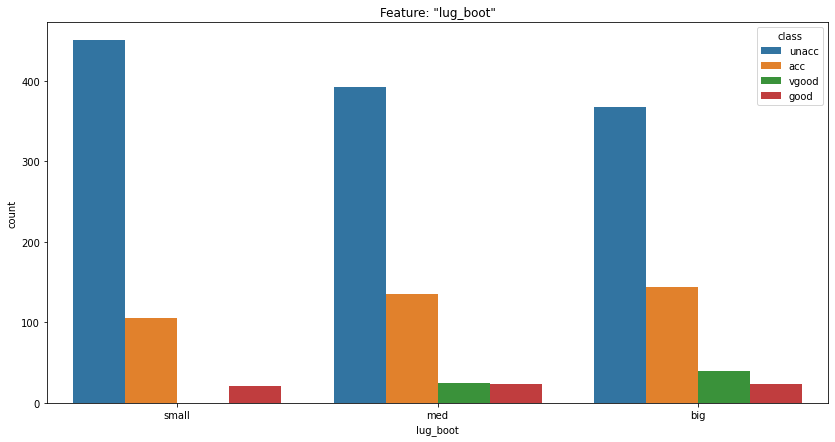

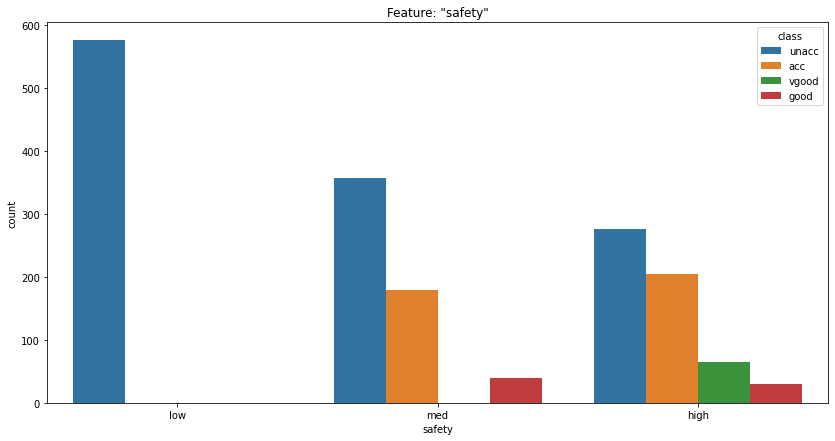

In [55]:
# Check how the target variable ('class') is distributed among each of the independent variables in the dataset
for column in dataset.columns[:-1]:
    plt.figure(figsize = (14, 7))
    plt.title('Feature: "%s"' %column)
    sns.countplot(dataset[column], hue = dataset['class'])

### **Encoding categorical data**

In [0]:
labelEncoder = LabelEncoder()

In [0]:
for column in dataset.columns:
    dataset[column] = labelEncoder.fit_transform(dataset[column])

In [58]:
dataset.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


### **Finding Correlation**

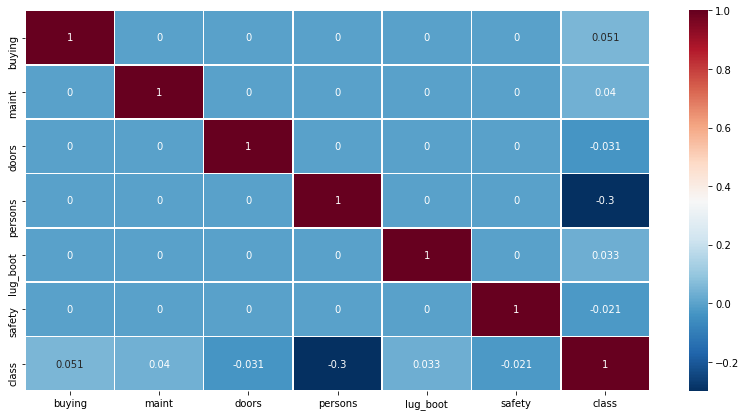

In [59]:
plt.figure(figsize = (14, 7))

# Calculate 'pearson' correlation which show correlation coeffitient of each variable with respect to othe variables
pearsonCorrelation = dataset.corr(method = 'pearson')

# Represent 'pearson' correlations in a heatmap
sns.heatmap(pearsonCorrelation, 
            xticklabels=pearsonCorrelation.columns,
            yticklabels=pearsonCorrelation.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.6)

**Results and Interpretation**:

A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. In our case, the maroon shows very strong correlations. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

**Findings**:
1. There are certainly weak correlation between the independent variables and the target variable 'class'. Thus, it's very unlikely to get any insights if these independent attributes are plotted against the dependent attribute 'class'.

## **Model Selection**

### **Data Preprocessing for Model Selection**

In [0]:
# Creating a matrix of independent variables
X = dataset.iloc[:, :-1].values

# Creating dependent variable vector
y = dataset.iloc[:, 6].values

### **Split dataset into Train and Test datasets**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### **1. KNN Classifier**

**K = 1**

In [89]:
# n_jobs = -1, (-1 means using all processors)
knnClassifier = KNeighborsClassifier(n_neighbors = 1,  n_jobs = -1)

knnClassifier.fit(X_train, y_train)
y_prediction = knnClassifier.predict(X_test)

# Compare actual target values (y_test) with predicted predicted values (y_prediction)
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_prediction))

Accuracy Score:  0.8073217726396917


**K = 5**

In [90]:
# n_jobs = -1, (-1 means using all processors)
knnClassifier = KNeighborsClassifier(n_neighbors = 5,  n_jobs = -1)

knnClassifier.fit(X_train, y_train)
y_prediction = knnClassifier.predict(X_test)

# Compare actual target values (y_test) with predicted predicted values (y_prediction)
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_prediction))

Accuracy Score:  0.9075144508670521


**Try to locate an even better value for K?**

In [0]:
# Try K = 1 through K = 25 and record testing accuracy
kRange = range(1, 25)
knnAccuracyScores = []

for K in kRange:
    knnClassifier = KNeighborsClassifier(n_neighbors = K,  n_jobs = -1)
    knnClassifier.fit(X_train, y_train)
    y_prediction = knnClassifier.predict(X_test)
    knnAccuracyScores.append(metrics.accuracy_score(y_test, y_prediction))

Text(0, 0.5, 'Testing Accuracy')

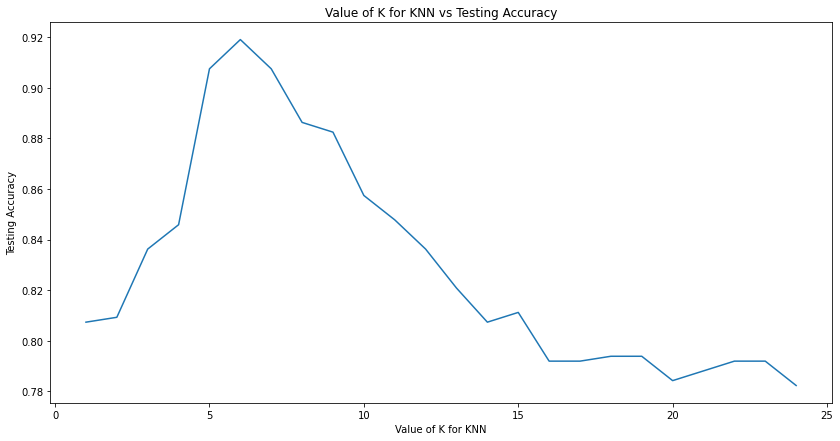

In [92]:
# Plot the relationship between K and testing accuracy
plt.figure(figsize = (14, 7))
plt.plot(kRange, knnAccuracyScores)
plt.title('Value of K for KNN vs Testing Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**Findings**:
1. From the graph above, for ***n_neighbors = 6***, the highest accuracy can be achieved.

**K = 7**

In [94]:
# n_jobs = -1, (-1 means using all processors)
knnClassifier = KNeighborsClassifier(n_neighbors = 6,  n_jobs = -1)

knnClassifier.fit(X_train, y_train)
y_prediction = knnClassifier.predict(X_test)

# Compare actual target values (y_test) with predicted predicted values (y_prediction)
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_prediction))

Accuracy Score:  0.9190751445086706
